# Starting Off

Imagine you are a financial analyst who wants to try and predict the price of a stock (Apple for example) two days from now. What pieces of information(features) whould you think woudl be helpful in trying to forecast the price of the stock?

Which of those features do you think would be most informative about the price after two days?



# Time Series Analysis: SARIMA Model

## Agenda:
- Working with time series data in pandas
- Components of time series data
- Stationarity
- ACF and PACF
- Fitting the Model
- Evaluating the Model


The methods of analysis and prediction dealing with data that is serially correlated is **Times Series Modeling**

A time series is a sequential set of data points, measured typically over successive times. It is mathematically defined as a set of vectors x(t),t = 0,1,2,... where t represents the time
elapsed [21, 23, 31]. The variable x(t) is treated as a random variable. The measurements
taken during an event in a time series are arranged in a proper chronological order.

**Question:** Come up with at least three examples of data you think is time series data.

### Working with Time Series Data in Pandas

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import statsmodels.api as sm


In [2]:
df=pd.read_csv('./resources/Sales_Data.csv', sep='\t', index_col=0)
df.head()

,purchase_date,payment_amount
ID,,
1003459795,2010-01-01 00:00:00,1779.0
1003462096,2010-01-03 00:00:00,2374.0
1003464028,2010-01-04 00:00:00,1449.0
1003464770,2010-01-04 00:00:00,2204.0
1003464895,2010-01-04 00:00:00,450.0


In [3]:
df.dtypes

purchase_date      object
payment_amount    float64
dtype: object

#### Turn the purchase data into a datetime stamp

In [4]:
df['purchase_date']= pd.to_datetime(df['purchase_date']) 

In [5]:
df.dtypes

purchase_date     datetime64[ns]
payment_amount           float64
dtype: object

***This data was for sales of tutoring programs and books. The client was only concerned  with sales of programs, so we removed all sales less than $100 to separate out the books.***

In [6]:
df = df[df['payment_amount']>100]


In [7]:
df.head(20)

,purchase_date,payment_amount
ID,,
1003459795,2010-01-01,1779.0
1003462096,2010-01-03,2374.0
1003464028,2010-01-04,1449.0
1003464770,2010-01-04,2204.0
1003464895,2010-01-04,450.0
1003464932,2010-01-04,1449.0
1003466632,2010-01-04,1304.0
1003467377,2010-01-04,1334.1
1003468224,2010-01-05,1779.0


### Aggregating our time series data

Above you see we have multiple entries for the same day. Each entry corresponds to a sale made that day. Can we leave the data as is or shoudl we transform it somehow? 

If you believe we shoud transform it, explain how.

In [8]:
 daily_sales = df.groupby(['purchase_date'])['payment_amount'].sum()

In [9]:
daily_sales.head()

purchase_date
2010-01-01      6456.0
2010-01-02     37953.1
2010-01-03     59445.4
2010-01-04    142296.7
2010-01-05    117510.4
Name: payment_amount, dtype: float64

In [10]:
### Plotting our Time Series Data

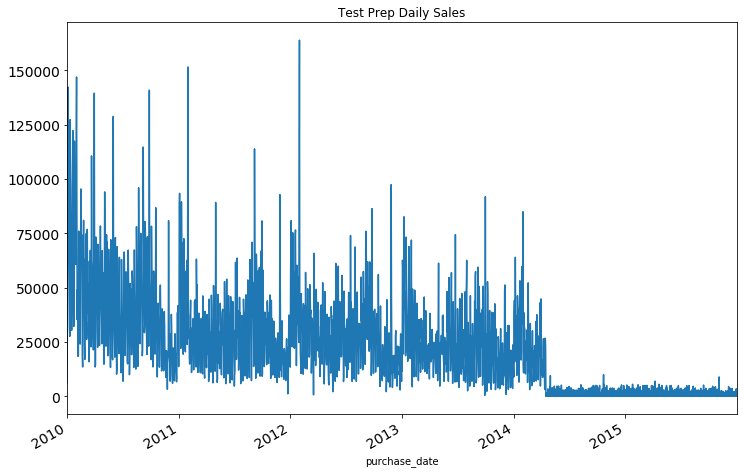

In [11]:
daily_sales.plot(figsize=(12,8), title= 'Test Prep Daily Sales', fontsize=14)

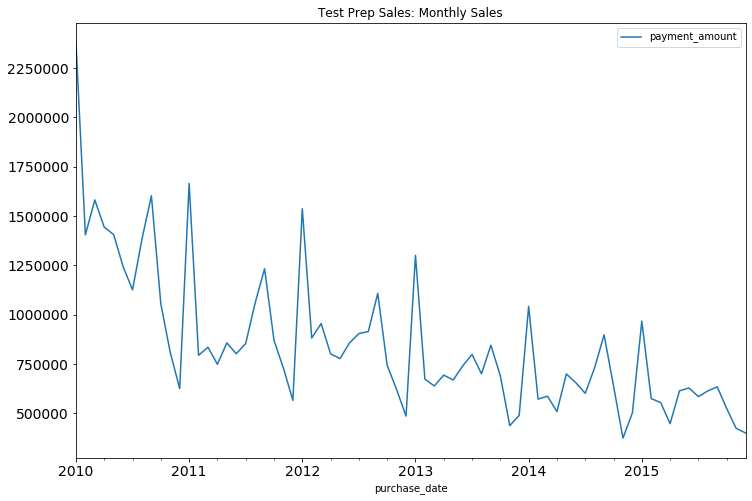

In [12]:
monthly_sales=daily_sales.resample('m').sum()
monthly_sales  = pd.DataFrame(monthly_sales, columns=['payment_amount'])
monthly_sales.plot(figsize=(12,8), title= 'Test Prep Sales: Monthly Sales', fontsize=14)

## Types of Models
There are two basic types of “time domain” models:

- Models that relate the present value of a series to past values and past prediction errors - these are called **ARIMA** models (for Autoregressive Integrated Moving Average). We’ll spend substantial time on these.
- Ordinary regression models that use time indices as x-variables. These can be helpful for an initial description of the data and form the basis of several simple forecasting methods.

### Components of Time Series Data
A time series in general is supposed to be affected by four main components, which can be separated from the observed data. These components are: *Trend, Cyclical, Seasonal and Irregular* components.

- **Trend** : The long term movement of a time series. For example, series relating to population growth, number of houses in a city etc. show upward trend.
- **Seasonality** : Fluctuation in the data set that follow a regular pattern due to outside influences. For example sales of ice-cream increase in summer, or daily web traffic.
- **Cyclical** : When data exhibit rises and falls that are not of fixed period.  Think of business cycles which usually last several years, but where the length of the current cycle is unknown beforehand.
- **Irregrular**: Are caused by unpredictable influences, which are not regular and also do not repeat in a particular pattern. These variations are caused by incidences such as war, strike, earthquake, flood, revolution, etc. There is no defined statistical technique for measuring random fluctuations in a time series.


*Note: Many people confuse cyclic behaviour with seasonal behaviour, but they are really quite different. If the fluctuations are not of fixed period then they are cyclic; if the period is unchanging and associated with some aspect of the calendar, then the pattern is seasonal.*

<Figure size 432x288 with 0 Axes>

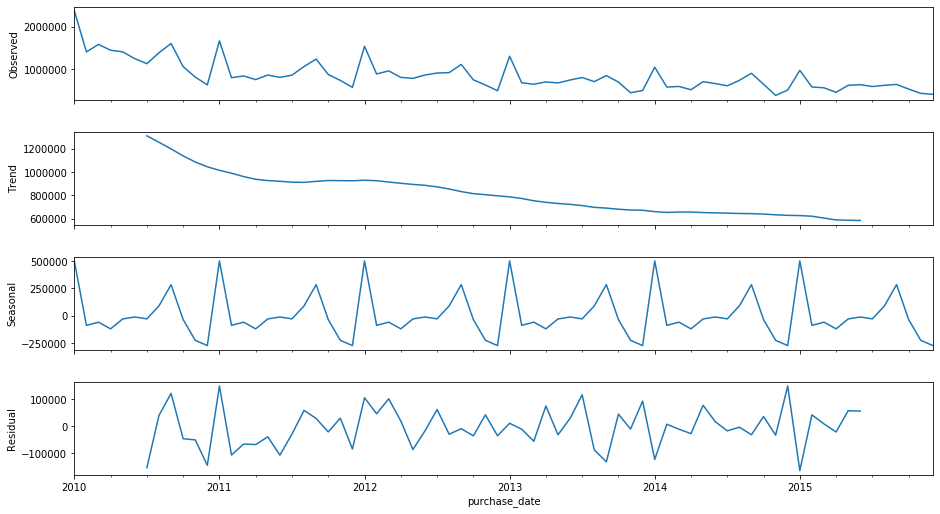

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(monthly_sales, freq=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

Why can't we use linear regression techniques to forecast for times Seriese data?



There are four principal assumptions which justify the use of linear regression models for purposes of inference or prediction:

- Linearity and additivity of the relationship between dependent and independent variables:

- Statistical independence of the errors (in particular, no correlation between consecutive errors in the case of time series data)

-  Homoscedasticity (constant variance) of the errors

- Normality of the error distribution.

### Statistical stationarity: 

A **stationary time series** is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., "stationarized") through the use of mathematical transformations. A stationarized series is relatively easy to predict: you simply predict that its statistical properties will be the same in the future as they have been in the past!  

### Visualizing Homoscedasticity:
    


#### Cosntant Mean

<img src='./resources/Mean_nonstationary.png' />

#### Constant Variance

<img src='./resources/Var_nonstationary.png' />

#### Autocovariance that does not depend on time.

<img src='./resources/Cov_nonstationary.png' />

## Two ways to check for stationarity

1. **Plot rolling Statistics**

    We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months.

2. **Dickey-Fuller Test**:
This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [14]:
monthly_sales.head()

,payment_amount
purchase_date,
2010-01-31,2378448.95
2010-02-28,1404627.65
2010-03-31,1581992.57
2010-04-30,1443978.55
2010-05-31,1406408.25


In [15]:
from statsmodels.tsa.stattools import adfuller

#create a function that will help us to quickly 
def test_stationarity(timeseries, window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries.iloc[window:], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


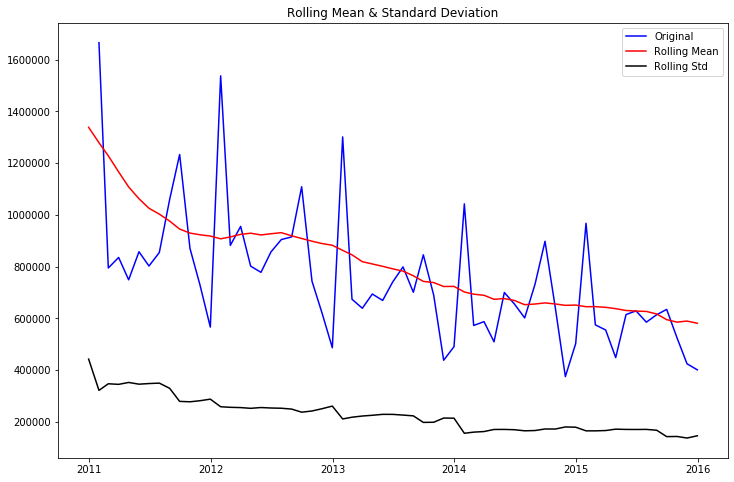

Results of Dickey-Fuller Test:
Test Statistic                 -1.446690
p-value                         0.559699
#Lags Used                     12.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


In [16]:
#test the stationarity of the untransformed dataset
test_stationarity(monthly_sales.payment_amount, 12)

### How to Stationarize time series data

A series of steps can be taken to stationarize your data - also known -  as removing trends (linear trends, seasonaility/periodicity, etc - more details on transformations <a href='http://people.duke.edu/~rnau/whatuse.htm'>here</a>).

- Log Transofrmation
- Deflating the data
- Differencing 
- Seasonal Differencing

#### Log Transformation

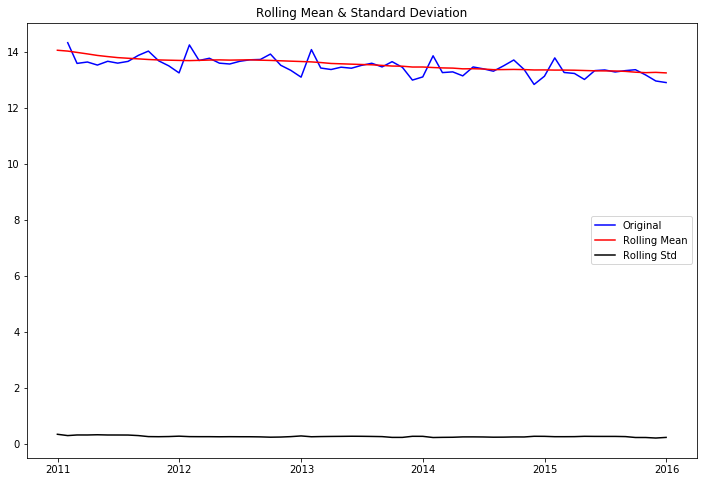

Results of Dickey-Fuller Test:
Test Statistic                 -1.231936
p-value                         0.659709
#Lags Used                     12.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


In [17]:

monthly_sales['natural_log'] = monthly_sales.payment_amount.apply(lambda x: np.log(x))  
test_stationarity(monthly_sales.natural_log, 12)

#### First Difference

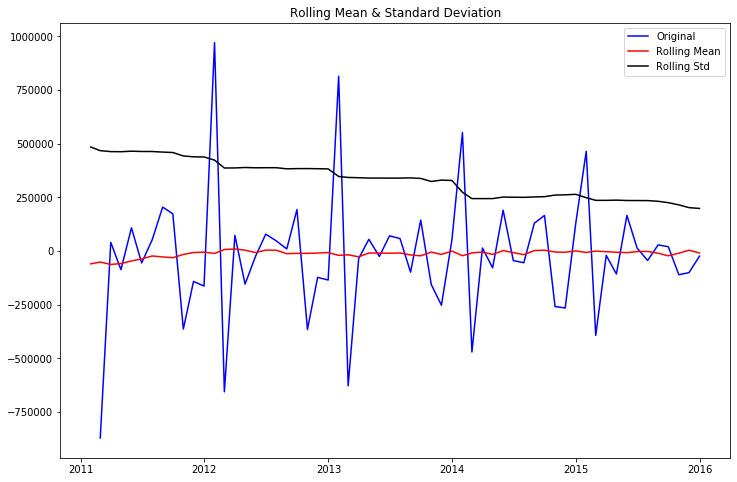

Results of Dickey-Fuller Test:
Test Statistic                 -2.775210
p-value                         0.061903
#Lags Used                     11.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


In [18]:
monthly_sales['first_difference'] = monthly_sales.payment_amount - monthly_sales.payment_amount.shift(1)  
test_stationarity(monthly_sales.first_difference.dropna(inplace=False),12)

#### Seasonal Difference

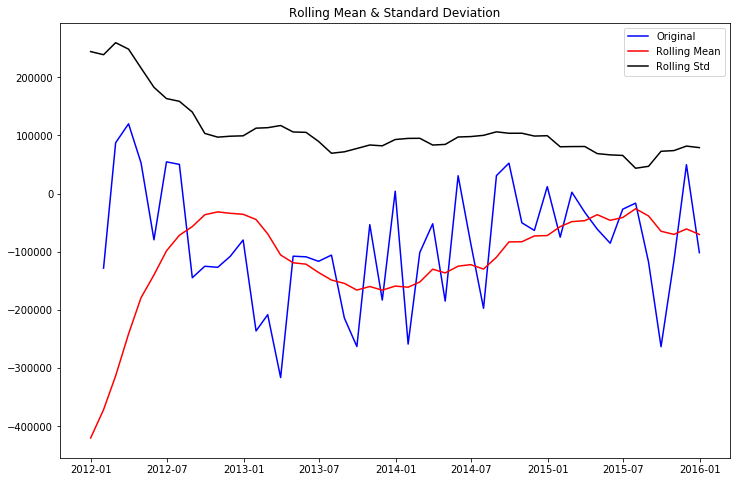

Results of Dickey-Fuller Test:
Test Statistic                 -3.533760
p-value                         0.007161
#Lags Used                      0.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


In [19]:
monthly_sales['seasonal_difference'] = monthly_sales.payment_amount - monthly_sales.payment_amount.shift(12)  
test_stationarity(monthly_sales.seasonal_difference.dropna(inplace=False), 12)

#### Seasonal Difference of the First Difference

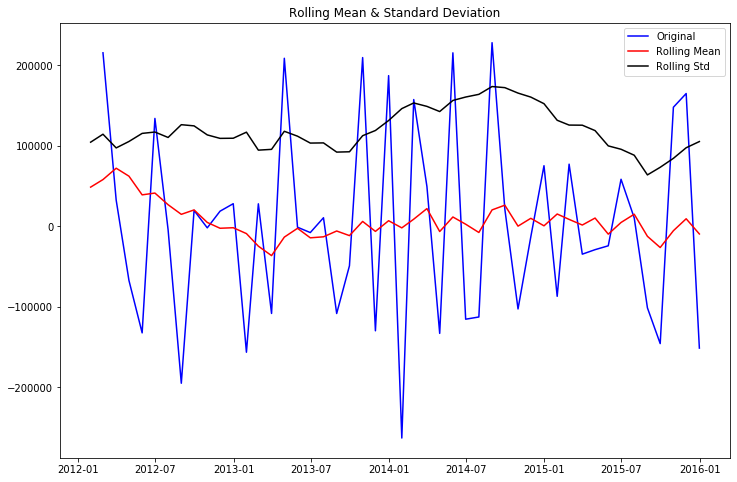

Results of Dickey-Fuller Test:
Test Statistic                -7.956275e+00
p-value                        3.031374e-12
#Lags Used                     1.000000e+00
Number of Observations Used    5.700000e+01
Critical Value (1%)           -3.550670e+00
Critical Value (5%)           -2.913766e+00
Critical Value (10%)          -2.594624e+00
dtype: float64


In [20]:
monthly_sales['seasonal_first_difference'] = monthly_sales.first_difference - monthly_sales.first_difference.shift(12)  
test_stationarity(monthly_sales.seasonal_first_difference.dropna(inplace=False), 12)

#### Season Difference of the log first difference

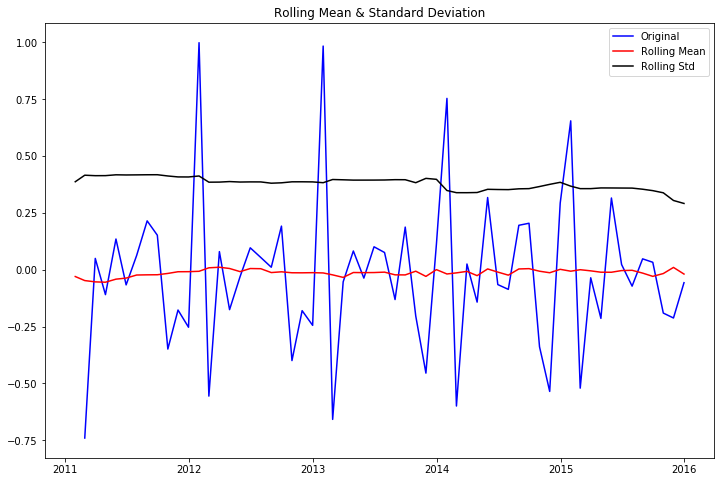

Results of Dickey-Fuller Test:
Test Statistic                 -3.224107
p-value                         0.018631
#Lags Used                     11.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


In [21]:
monthly_sales['log_first_difference'] = monthly_sales.natural_log - monthly_sales.natural_log.shift(1)  
monthly_sales['log_seasonal_first_difference'] = monthly_sales.log_first_difference - monthly_sales.log_first_difference.shift(12)  

test_stationarity(monthly_sales.log_first_difference.dropna(inplace=False), 12)


Sometimes, we have to difference the differenced data (known as a second difference) to achieve stationary data. The number of times we have to difference our data is the order of differencing - we will use this information when building our model.

### Running a linear regression model with stationary time series data

You can take your newly stationary data and use it as your target variable for a linear regression model. 

Making your data stationary tries to remove the correlation between serial time points. There still can be soem element of time that can explain changes in your target variable. A leap year, for example, will add an extra day for sales in February.  

1. How should we account for this in our linear regression model?
2. What are other time components that we might want to account for in a linear regression model? (think about other examples of hourly, daily, or weekly data)

***When performing a linear regression model on time series data, you need to eventually transformyour data back to the original scale***

### Reversing a first difference

In [22]:
df_diff = pd.DataFrame({'A': np.random.randint(0, 10, 10)})
df_diff['B'] = df_diff['A'].diff()

x, x_diff = df_diff['A'].iloc[0], df_diff['B'].iloc[1:]
df_diff['C'] = np.r_[x, x_diff].cumsum().astype(int)
df_diff.head()

,A,B,C
0,9,NaN,9
1,3,-6.0,3
2,4,1.0,4
3,5,1.0,5
4,7,2.0,7


## Practice:

Take the following time series data and try to make it as stationary as possible. 

In [23]:
df_transit = pd.read_csv('./resources/portland-oregon-average-monthly-.csv', index_col=0)
df_transit.head()

,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
Month,
1960-01,648
1960-02,646
1960-03,639
1960-04,654
1960-05,630


In [24]:
df_transit.columns = ['riders']

In [25]:
df_transit.head()

,riders
Month,
1960-01,648
1960-02,646
1960-03,639
1960-04,654
1960-05,630


In [26]:
df_transit.tail(1)

,riders
Month,
Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982,n=114


In [27]:
df_transit.index[114]

'Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982'

In [28]:

df_transit.drop(df_transit.index[114], inplace=True)

In [29]:
df_transit.head()

,riders
Month,
1960-01,648
1960-02,646
1960-03,639
1960-04,654
1960-05,630


In [30]:
df_transit['riders']= df_transit['riders'].astype('int64')

In [31]:
df_transit.dtypes

riders    int64
dtype: object

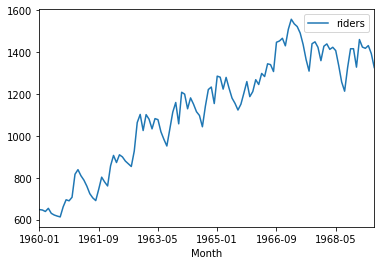

In [32]:
df_transit.plot()

## Starting Off

Imagine you have a time series dataset of weekly sales of a product over time, and you want to build a regression model only using only this data. What would be the features (terms) of the model?

**Goal:** Students will be able to build and evaluate an ARIMA based model using ACF and PACF plots to choose the appropriate terms of the model.

**Agenda:**  
- Review AR and MA terms
- Explain ACF and PACF charts
- Build an ARIMA Model

### Great Resources:

- https://newonlinecourses.science.psu.edu/stat510/lesson/1
- https://people.duke.edu/~rnau/411arim.htm

### Steps to modeling time series data
![steps](./resources/flowchart.png)

### Autoregressive Integrated Moving Average  (ARIMA)

#### Autoregressive term

If the series is stationary and autocorrelated, perhaps it can be predicted as a multiple of its own previous value, plus a constant.  The forecasting equation in this case is:


$$Ŷt  =  μ  +  ϕ1Yt-1$$

…which is Y regressed on itself lagged by one period. 

####  Moving Average term

Another strategy for correcting autocorrelated errors is to use an average of the last few observations in order to filter out the noise and more accurately estimate the local mean. One of which is the so-called “error correction” form, in which the previous forecast is adjusted in the direction of the error it made:

$$Ŷ_t   =  Ŷ_{t-1}  + αe_{t-1}$$  

Because $e_{t-1} = Y_{t-1} - Ŷ_{t-1}$ by definition, this can be rewritten as:

$$Ŷ_t   =  Y_{t-1}  - (1-α)e_{t-1}$$

$$Ŷ_t=  Y_{t-1}  - θ_1e_{t-1}$$



### Integrated

Refers to the order of differencing used in the model. 


An ARIMA model is classified as an **ARIMA(p,d,q)** model, 

    **p** = number of autoregressive (AR) terms 
    **d** = number of differences 
    **q** = number of moving average (MA) terms

One we have achieved stationarity the next step in fitting a model to address any autocorrelation that remains in the differenced series.

## Plot ACF/PACF charts and find optimal parameters.

### Autocorrelation Function ACF


The sample autocorrelation function (ACF) for a series gives correlations between the series  and lagged values of the series for lags of 1, 2, 3, and so on. The lagged values can be written as , and so on. The ACF gives correlations between  and ,  and , and so on.

The ACF can be used to identify the possible structure of time series data. That can be tricky going as there often isn’t a single clear-cut interpretation of a sample autocorrelation function.

### Partial autocorrelation 

In general, a partial correlation is a conditional correlation. It is the correlation between two variables under the assumption that we know and take into account the values of some other set of variables. For instance, consider a regression context in which y is the response variable and , , and  are predictor variables. The partial correlation between y and  is the correlation between the variables determined taking into account how both y and  are related to  and .


## ACF and PACF

#### on original data

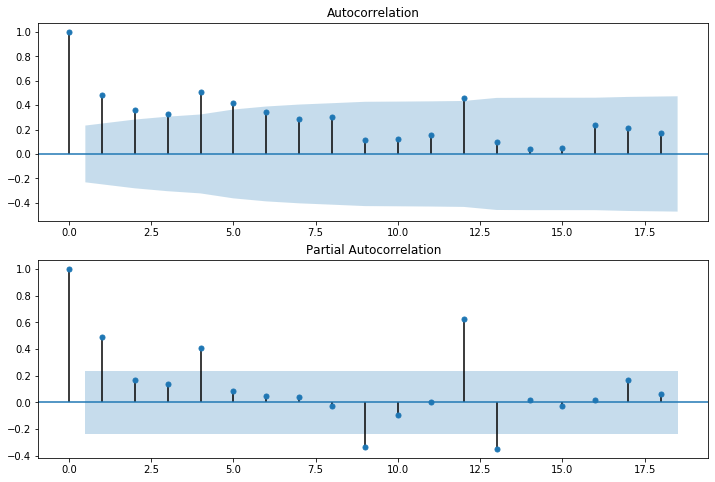

In [33]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(monthly_sales.payment_amount.iloc[1:], lags=18, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(monthly_sales.payment_amount.iloc[1:], lags=18, ax=ax2)

#### on first difference

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


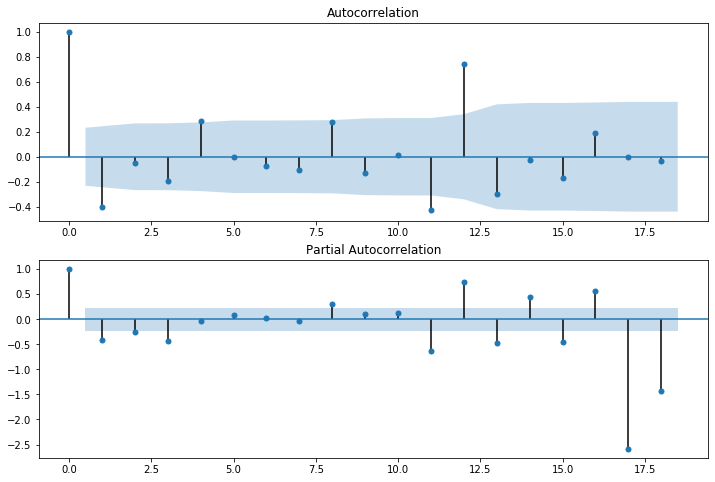

In [34]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(monthly_sales.first_difference.iloc[1:], lags=18, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(monthly_sales.first_difference.iloc[1:], lags=18, ax=ax2)

#### on seasonal first difference

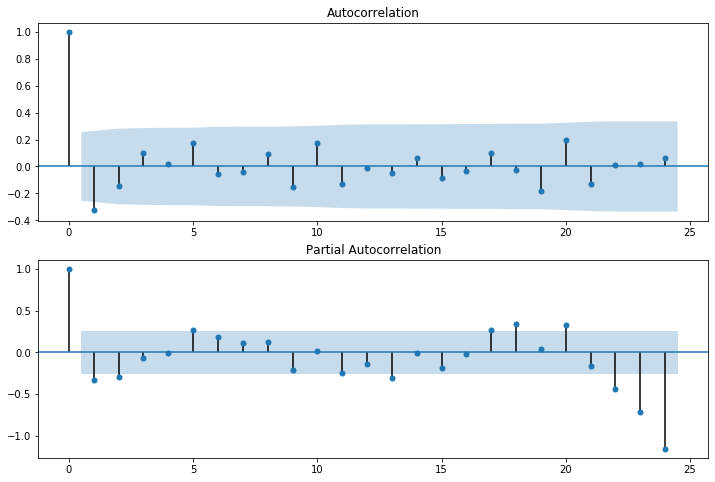

In [35]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(monthly_sales.seasonal_first_difference.iloc[13:], lags=24, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(monthly_sales.seasonal_first_difference.iloc[13:], lags=24, ax=ax2)

Since there is still some correlation between the times series data, we want to include terms that will account for this correlation. 



#### Determinging AR and MA terms


What’s the best way to correct for autocorrelation: adding AR terms or adding MA terms?  

A rule-of-thumb for this situation, which will be discussed in more detail later on, is that positive autocorrelation is usually best treated by adding an AR term to the model and negative autocorrelation is usually best treated by adding an MA term. 


![alt text](./resources/armaguidelines.png)

#### Rules for Indentifying ARIMA Models

https://people.duke.edu/~rnau/arimrule.htm

# Seasonal ARIMA model with Exogenous Factors  (SARIMAX)

A seasonal ARIMA model is classified as an **ARIMA(p,d,q)x(P,D,Q)** model, 

    **p** = number of autoregressive (AR) terms 
    **d** = number of differences 
    **q** = number of moving average (MA) terms
     
    **P** = number of seasonal autoregressive (SAR) terms 
    **D** = number of seasonal differences 
    **Q** = number of seasonal moving average (SMA) terms
    
**Exogenous Factors** refers to any features that are not derived from the target variable.  So any additional features like 

### Question

If you are trying to predict sales of grad school prep courses, what are some exogenous features you would want to include in your model?

### Estimating and Diagnosing a Possible Model
After you’ve made a guess (or two) at a possible model, use software such as R, Minitab, or SAS to estimate the coefficients. Most software will use maximum likelihood estimation methods to make the estimates. Once the model has been estimated, do the following.

- Look at the significance of the coefficients. In R, sarima provides p-values and so you may simply compare the p-value to the standard 0.05 cut-off. The arima command does not provide p-values and so you can calculate a t-statistic:  = estimated coeff. / std. error of coeff. Recall that  is the Student -value with area  to the right of  on df degrees of freedom. If , then the estimated coefficient is significantly different from 0. When n is large, you may compare estimated coeff. / std. error of coeff to 1.96.
- Look at the ACF of the residuals. For a good model, all autocorrelations for the residual series should be non-significant. If this isn’t the case, you need to try a different model.
- Look at Box-Pierce (Ljung) tests for possible residual autocorrelation at various lags (see Lesson 3.2 for a description of this test).
- If non-constant variance is a concern, look at a plot of residuals versus fits and/or a time series plot of the residuals.
If something looks wrong, you’ll have to revise your guess at what the model might be. This might involve adding parameters or re-interpreting the original ACF and PACF to possibly move in a different direction.

### What if More Than One Model Looks Okay?
Sometimes more than one model can seem to work for the same dataset. When that’s the case, some things you can do to decide between the models are:

- Possibly choose the model with the fewest parameters.
- Examine standard errors of forecast values. Pick the model with the generally lowest standard errors for predictions of the future.
- Compare models with regard to statistics such as the MSE (the estimate of the variance of the wt), AIC, AICc, and SIC (also called BIC). Lower values of these statistics are desirable.

## Fitting the Model

In [36]:
sm.tsa.statespace.SARIMAX()

TypeError: __init__() missing 1 required positional argument: 'endog'

In [37]:
mod = sm.tsa.statespace.SARIMAX(monthly_sales['payment_amount'], trend='n', order=(0,1,1), seasonal_order=(0,1,1,12))
res = mod.fit()
print(res.summary())

                                 Statespace Model Results                                 
Dep. Variable:                     payment_amount   No. Observations:                   72
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -771.166
Date:                            Mon, 08 Jul 2019   AIC                           1548.332
Time:                                    16:00:16   BIC                           1554.565
Sample:                                01-31-2010   HQIC                          1550.765
                                     - 12-31-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1423      0.066     -2.170      0.030      -0.271      -0.014
ma.S.L12      -0.0554      0.061   

## Evaluating a Time Series Model

Can we use test train split when evaluating this model? 

<img src='https://people.duke.edu/~rnau/randwkf2.gif' width=700 />

-  The data in the **estimation period** are used to help select the model and to estimate its parameters. Forecasts made in this period are not completely "honest" because data on both sides of each observation are used to help determine the forecast. 

- The data in the **validation period** are held out during parameter estimation, and if you are careful you will also withhold these values during the exploratory phase of analysis when you select your model. One-step-ahead forecasts made in this period are often called backtests. Ideally, these are "honest" forecasts, however, if you test a great number of models and choose the model whose errors are smallest in the validation period, you may end up overfitting the data within the validation period as well as in the estimation period.

- **Forecasts into the future** are "true" forecasts that are made for time periods beyond the end of the available data. For a model which is purely extrapolative in nature , it is possible to extend the forecasts an arbitrary number of periods into the future by "bootstrapping" the model: first a one-period-ahead forecast is made, then the one-period-ahead forecast is treated as a data point and the model is cranked ahead to produce a two-period-ahead forecast, and so on as far as you wish.

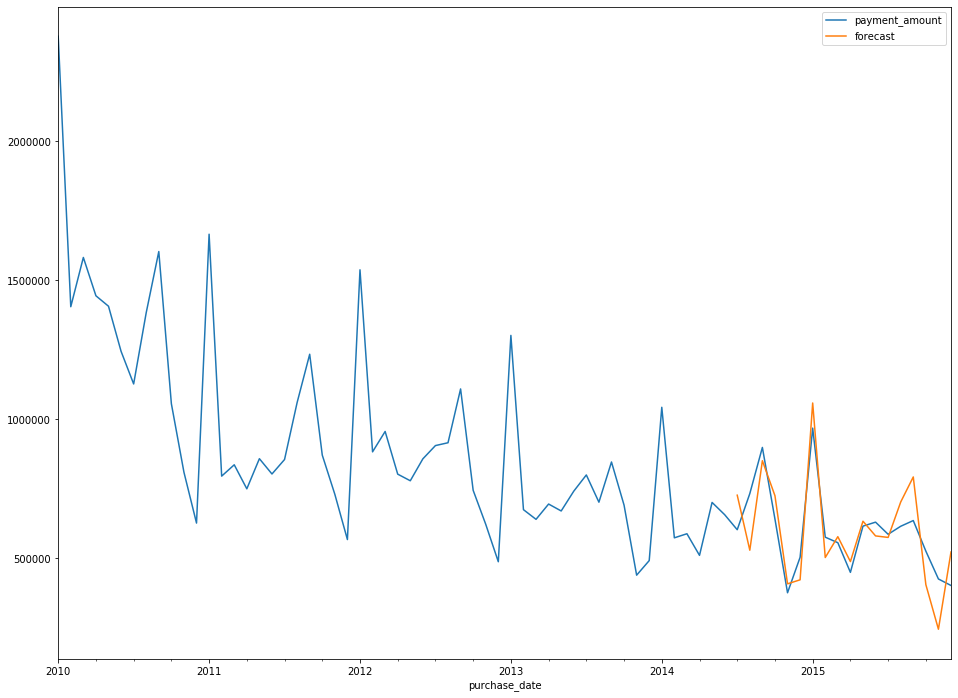

In [38]:
monthly_sales['forecast'] = res.predict(start = 54, end= 72, dynamic= False)  
monthly_sales[['payment_amount', 'forecast']].plot(figsize=(16, 12)) 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


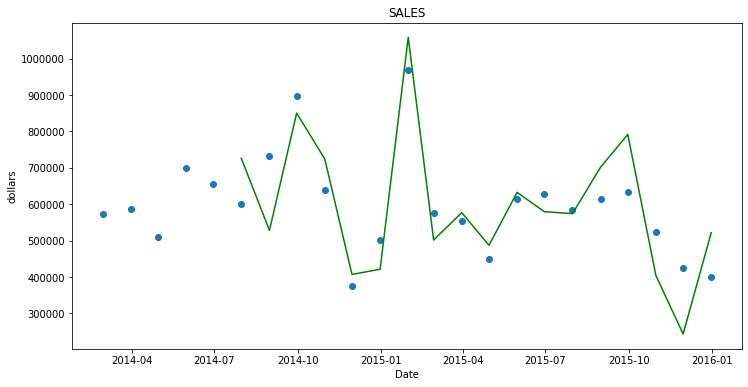

In [39]:
npredict =monthly_sales.payment_amount['2015'].shape[0]
nobs = monthly_sales.payment_amount.shape[0]



 
# Graph
fig, ax = plt.subplots(figsize=(12,6))
npre = 12
ax.set(title='SALES', xlabel='Date', ylabel='dollars')
ax.plot(monthly_sales.index[-npredict-npre+1:], monthly_sales.ix[-npredict-npre+1:, 'payment_amount'], 'o', label='Observed')
ax.plot(monthly_sales.index[-npredict-npre+1:], monthly_sales.ix[-npredict-npre+1:, 'forecast'], 'g', label='Dynamic forecast')


### Mean Absolute Error per prediction

In [40]:
np.abs(monthly_sales['2015']['payment_amount']- monthly_sales['2015']['forecast']).sum()/len(monthly_sales['2015'])

80777.75943592077

## Now let's predict all of 2016

In order for this to work, we need to extend our current data frame to account for the future time periods we will predict on.

In [41]:
from dateutil.relativedelta import relativedelta

start = datetime.datetime.strptime("2016-01-31", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,12)]
future = pd.DataFrame(index=date_list, columns= monthly_sales.columns)
monthly_sales = pd.concat([monthly_sales, future])

In [42]:
res.predict()

purchase_date
2010-01-31    0.000000e+00
2010-02-28    2.046771e+06
2010-03-31    1.495959e+06
2010-04-30    1.569751e+06
2010-05-31    1.461874e+06
2010-06-30    1.414300e+06
2010-07-31    1.268257e+06
2010-08-31    1.146743e+06
2010-09-30    1.349651e+06
2010-10-31    1.567208e+06
2010-11-30    1.128259e+06
2010-12-31    8.718056e+05
2011-01-31    2.907564e+06
2011-02-28    9.223437e+05
2011-03-31    9.805311e+05
2011-04-30    7.258157e+05
2011-05-31    7.102797e+05
2011-06-30    6.832039e+05
2011-07-31    6.745505e+05
2011-08-31    1.071492e+06
2011-09-30    1.269149e+06
2011-10-31    7.210397e+05
2011-11-30    6.160881e+05
2011-12-31    5.412237e+05
2012-01-31    1.669618e+06
2012-02-29    6.827281e+05
2012-03-31    9.015892e+05
2012-04-30    8.589526e+05
2012-05-31    9.105295e+05
2012-06-30    7.363902e+05
                  ...     
2013-07-31    7.876587e+05
2013-08-31    8.184887e+05
2013-09-30    9.103838e+05
2013-10-31    4.895318e+05
2013-11-30    5.380212e+05
2013-12-31    

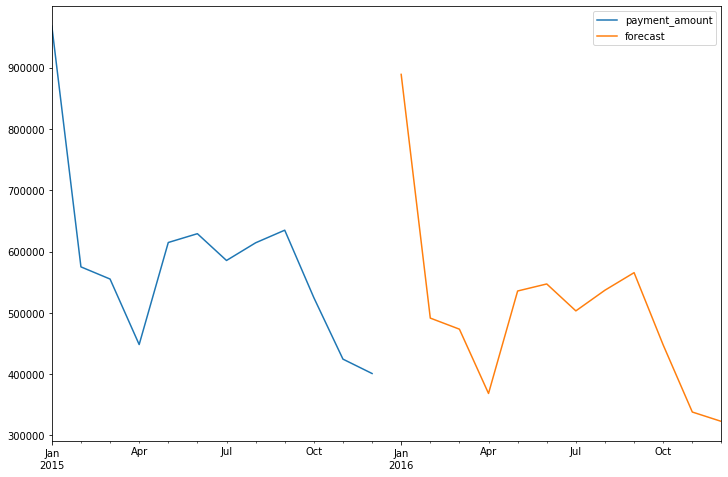

In [43]:
monthly_sales['forecast'] = res.predict(start = 72, end = 84, dynamic= True)  
monthly_sales[['payment_amount', 'forecast']].iloc[-24:].plot(figsize=(12, 8)) 
plt.savefig('ts_predict_future.png', bbox_inches='tight')

## Application practice with dataset of trasit riders in Portland

In [44]:
df_transit.head()

,riders
Month,
1960-01,648
1960-02,646
1960-03,639
1960-04,654
1960-05,630
